In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [2]:
# print the Classification Report
target_names = ['०','१','२','३','४','५','६','७','८','९']

In [3]:
#1. Load train data set
data=pd.read_csv("D:/Dataset/NHWCSVDataset/nhwDigitDatset.csv")
print("Train Data Shape: ",data.shape)
data.head()

Train Data Shape:  (17000, 1025)


,1*1,1*2,1*3,1*4,1*5,1*6,1*7,1*8,1*9,1*10,...,32*24,32*25,32*26,32*27,32*28,32*29,32*30,32*31,32*32,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36


Text(0.5, 1.0, 'Nau')

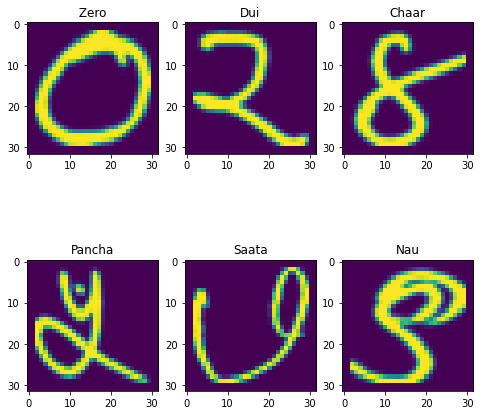

In [4]:
plt.figure(figsize=(8,8))
plt.subplot(2,3,1)  # 2--rows and 2--columns  index=1
zero = data.iloc[1000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title(" Zero ")

plt.subplot(2,3,2)  # 2--rows and 2--columns  index=2
zero = data.iloc[3702, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Dui")

plt.subplot(2,3,3)   # 2--rows and 2--columns  index=3
zero = data.iloc[8200, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Chaar")

plt.subplot(2,3,4)   # 2--rows and 2--columns  index=3
zero = data.iloc[9400, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Pancha")

plt.subplot(2,3,5)   # 2--rows and 2--columns  index=3
zero = data.iloc[12000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Saata")

plt.subplot(2,3,6)   # 2--rows and 2--columns  index=3
zero = data.iloc[15800, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Nau")

In [5]:
# check unique label column
np.unique(data['Label'])

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [6]:
X=data.iloc[:,0:-1]

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(data[['Label']])
Y=Y.toarray()
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
# 3. If needed , Normalize data
X = MinMaxScaler().fit_transform(X)

In [9]:
# Split Dataset into training and Testing sets
Train_X,Test_X, Train_Y,Test_Y =train_test_split(X,Y,test_size=0.2,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (13600, 1024)
X_test:  (3400, 1024)
Y_train:  (13600, 10)
Y_test:  (3400, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Activation

# define the keras model
model = Sequential()
# Layer 1
model.add(Dense(100, input_dim=1024, activation='relu'))

# Layer 2
model.add(Dense(50, activation='relu'))

#layer -3
model.add(Dense(32, activation='relu'))

#layer 4
model.add(Dense(16, activation='relu'))

# output Layer
model.add(Dense(10, activation='softmax'))


from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# fit the keras model on the dataset
History=model.fit(Train_X,Train_Y,validation_data=(Test_X, Test_Y), epochs=500, batch_size=128,verbose=1)

Epoch 1/500
107/107 [==============================] - 0s 4ms/step - loss: 2.0207 - accuracy: 0.2529 - val_loss: 1.7204 - val_accuracy: 0.3597
Epoch 2/500
107/107 [==============================] - 0s 3ms/step - loss: 1.4225 - accuracy: 0.4271 - val_loss: 1.1786 - val_accuracy: 0.4976
Epoch 3/500
107/107 [==============================] - 0s 3ms/step - loss: 0.9207 - accuracy: 0.7243 - val_loss: 0.7044 - val_accuracy: 0.8456
Epoch 4/500
107/107 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.8702 - val_loss: 0.4581 - val_accuracy: 0.8953
Epoch 5/500
107/107 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.9063 - val_loss: 0.3503 - val_accuracy: 0.9106
Epoch 6/500
107/107 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.9253 - val_loss: 0.2898 - val_accuracy: 0.9221
Epoch 7/500
107/107 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9374 - val_loss: 0.2574 - val_accuracy: 0.9285

107/107 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9996 - val_loss: 0.0782 - val_accuracy: 0.9765
Epoch 58/500
107/107 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9996 - val_loss: 0.0782 - val_accuracy: 0.9774
Epoch 59/500
107/107 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 0.0785 - val_accuracy: 0.9768
Epoch 60/500
107/107 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9998 - val_loss: 0.0802 - val_accuracy: 0.9774
Epoch 61/500
107/107 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 0.0791 - val_accuracy: 0.9782
Epoch 62/500
107/107 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9999 - val_loss: 0.0780 - val_accuracy: 0.9762
Epoch 63/500
107/107 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 0.0793 - val_accuracy: 0.9776
Epoch

107/107 [==============================] - 0s 3ms/step - loss: 2.1345e-04 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9785
Epoch 114/500
107/107 [==============================] - 0s 3ms/step - loss: 1.9694e-04 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9782
Epoch 115/500
107/107 [==============================] - 0s 3ms/step - loss: 1.8171e-04 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9788
Epoch 116/500
107/107 [==============================] - 0s 2ms/step - loss: 1.7162e-04 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9788
Epoch 117/500
107/107 [==============================] - 0s 3ms/step - loss: 1.6414e-04 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9785
Epoch 118/500
107/107 [==============================] - 0s 2ms/step - loss: 1.5439e-04 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9782
Epoch 119/500
107/107 [==============================] - 0s 2ms/step - loss: 1.4559e-04 - accuracy: 1.0000 - val_loss: 0

107/107 [==============================] - 0s 3ms/step - loss: 7.4053e-06 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9785
Epoch 169/500
107/107 [==============================] - 0s 2ms/step - loss: 6.8756e-06 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9785
Epoch 170/500
107/107 [==============================] - 0s 3ms/step - loss: 6.4075e-06 - accuracy: 1.0000 - val_loss: 0.1169 - val_accuracy: 0.9788
Epoch 171/500
107/107 [==============================] - 0s 3ms/step - loss: 5.9940e-06 - accuracy: 1.0000 - val_loss: 0.1176 - val_accuracy: 0.9785
Epoch 172/500
107/107 [==============================] - 0s 3ms/step - loss: 5.6231e-06 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 0.9788
Epoch 173/500
107/107 [==============================] - 0s 3ms/step - loss: 5.3583e-06 - accuracy: 1.0000 - val_loss: 0.1198 - val_accuracy: 0.9788
Epoch 174/500
107/107 [==============================] - 0s 3ms/step - loss: 5.1432e-06 - accuracy: 1.0000 - val_loss: 0

107/107 [==============================] - 0s 3ms/step - loss: 2.9510e-07 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 0.9794
Epoch 224/500
107/107 [==============================] - 0s 3ms/step - loss: 2.7680e-07 - accuracy: 1.0000 - val_loss: 0.1439 - val_accuracy: 0.9797
Epoch 225/500
107/107 [==============================] - 0s 3ms/step - loss: 2.6442e-07 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9794
Epoch 226/500
107/107 [==============================] - 0s 4ms/step - loss: 2.5091e-07 - accuracy: 1.0000 - val_loss: 0.1451 - val_accuracy: 0.9791
Epoch 227/500
107/107 [==============================] - 0s 3ms/step - loss: 2.3784e-07 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9791
Epoch 228/500
107/107 [==============================] - 0s 3ms/step - loss: 2.2262e-07 - accuracy: 1.0000 - val_loss: 0.1448 - val_accuracy: 0.9791
Epoch 229/500
107/107 [==============================] - 0s 3ms/step - loss: 2.1325e-07 - accuracy: 1.0000 - val_loss: 0

107/107 [==============================] - 0s 3ms/step - loss: 2.1326e-08 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 0.9791
Epoch 279/500
107/107 [==============================] - 0s 3ms/step - loss: 2.0809e-08 - accuracy: 1.0000 - val_loss: 0.1659 - val_accuracy: 0.9791
Epoch 280/500
107/107 [==============================] - 0s 3ms/step - loss: 2.0108e-08 - accuracy: 1.0000 - val_loss: 0.1667 - val_accuracy: 0.9791
Epoch 281/500
107/107 [==============================] - 0s 3ms/step - loss: 1.8907e-08 - accuracy: 1.0000 - val_loss: 0.1668 - val_accuracy: 0.9788
Epoch 282/500
107/107 [==============================] - 0s 3ms/step - loss: 1.8223e-08 - accuracy: 1.0000 - val_loss: 0.1670 - val_accuracy: 0.9791
Epoch 283/500
107/107 [==============================] - 0s 3ms/step - loss: 1.7785e-08 - accuracy: 1.0000 - val_loss: 0.1674 - val_accuracy: 0.9791
Epoch 284/500
107/107 [==============================] - 0s 3ms/step - loss: 1.7101e-08 - accuracy: 1.0000 - val_loss: 0

107/107 [==============================] - 0s 3ms/step - loss: 4.5492e-09 - accuracy: 1.0000 - val_loss: 0.1781 - val_accuracy: 0.9794
Epoch 333/500
107/107 [==============================] - ETA: 0s - loss: 4.2860e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 4.4002e-09 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9794
Epoch 334/500
107/107 [==============================] - 0s 3ms/step - loss: 4.4002e-09 - accuracy: 1.0000 - val_loss: 0.1781 - val_accuracy: 0.9794
Epoch 335/500
107/107 [==============================] - 0s 2ms/step - loss: 4.2249e-09 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9794
Epoch 336/500
107/107 [==============================] - 0s 3ms/step - loss: 4.0408e-09 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9794
Epoch 337/500
107/107 [==============================] - 0s 3ms/step - loss: 4.1460e-09 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9794
Epoch 338/500
107/107 [==============================] - 0s 3ms/step - los

Epoch 387/500
107/107 [==============================] - 0s 3ms/step - loss: 2.6121e-09 - accuracy: 1.0000 - val_loss: 0.1834 - val_accuracy: 0.9794
Epoch 388/500
107/107 [==============================] - 0s 3ms/step - loss: 2.7085e-09 - accuracy: 1.0000 - val_loss: 0.1840 - val_accuracy: 0.9797
Epoch 389/500
107/107 [==============================] - 0s 3ms/step - loss: 2.5507e-09 - accuracy: 1.0000 - val_loss: 0.1836 - val_accuracy: 0.9794
Epoch 390/500
107/107 [==============================] - 0s 3ms/step - loss: 2.7699e-09 - accuracy: 1.0000 - val_loss: 0.1829 - val_accuracy: 0.9788
Epoch 391/500
107/107 [==============================] - 0s 3ms/step - loss: 2.5770e-09 - accuracy: 1.0000 - val_loss: 0.1834 - val_accuracy: 0.9788
Epoch 392/500
107/107 [==============================] - 0s 3ms/step - loss: 2.5595e-09 - accuracy: 1.0000 - val_loss: 0.1833 - val_accuracy: 0.9797
Epoch 393/500
107/107 [==============================] - 0s 3ms/step - loss: 2.7085e-09 - accuracy: 1.0000

107/107 [==============================] - 0s 3ms/step - loss: 2.5069e-09 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 0.9794
Epoch 442/500
107/107 [==============================] - 0s 3ms/step - loss: 2.5770e-09 - accuracy: 1.0000 - val_loss: 0.1880 - val_accuracy: 0.9794
Epoch 443/500
107/107 [==============================] - 0s 3ms/step - loss: 2.4455e-09 - accuracy: 1.0000 - val_loss: 0.1874 - val_accuracy: 0.9794
Epoch 444/500
107/107 [==============================] - 0s 3ms/step - loss: 2.3930e-09 - accuracy: 1.0000 - val_loss: 0.1876 - val_accuracy: 0.9794
Epoch 445/500
107/107 [==============================] - 0s 3ms/step - loss: 2.3053e-09 - accuracy: 1.0000 - val_loss: 0.1869 - val_accuracy: 0.9794
Epoch 446/500
107/107 [==============================] - 0s 3ms/step - loss: 2.4455e-09 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9794
Epoch 447/500
107/107 [==============================] - 0s 3ms/step - loss: 2.3228e-09 - accuracy: 1.0000 - val_loss: 0

107/107 [==============================] - 0s 3ms/step - loss: 2.2352e-09 - accuracy: 1.0000 - val_loss: 0.1918 - val_accuracy: 0.9788
Epoch 497/500
107/107 [==============================] - 0s 3ms/step - loss: 2.0862e-09 - accuracy: 1.0000 - val_loss: 0.1921 - val_accuracy: 0.9797
Epoch 498/500
107/107 [==============================] - 0s 3ms/step - loss: 2.1738e-09 - accuracy: 1.0000 - val_loss: 0.1918 - val_accuracy: 0.9797
Epoch 499/500
107/107 [==============================] - 0s 3ms/step - loss: 2.1913e-09 - accuracy: 1.0000 - val_loss: 0.1918 - val_accuracy: 0.9797
Epoch 500/500
107/107 [==============================] - 0s 3ms/step - loss: 2.3228e-09 - accuracy: 1.0000 - val_loss: 0.1919 - val_accuracy: 0.9791


In [11]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

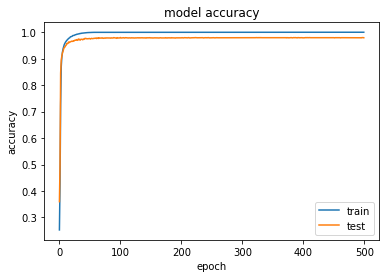

In [12]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

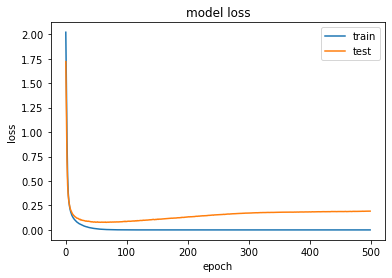

In [13]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
ypred=model.predict(Test_X)
#ypred

In [41]:
import numpy as np
ypred1=np.argmax(ypred,axis=1)
ypred1

array([2, 7, 7, ..., 2, 7, 8], dtype=int64)

In [42]:
Test_Y1=np.argmax(Test_Y,axis=1)
Test_Y1

array([2, 7, 7, ..., 2, 7, 8], dtype=int64)

In [43]:
print(confusion_matrix(Test_Y1,ypred1))

[[339   0   0   1   0   0   0   1   0   0]
 [  1 323   0   0   0   0   1   0   0   2]
 [  0   0 343   7   1   1   1   0   1   0]
 [  0   0  10 288   0   0   5   1   0   0]
 [  0   2   1   0 317   1   0   1   0   1]
 [  0   0   2   3   1 357   1   2   0   0]
 [  0   0   1   1   1   1 351   0   0   0]
 [  2   0   0   1   1   1   1 348   0   0]
 [  1   0   0   0   0   0   0   0 347   1]
 [  2   1   0   0   0   0   0   0   0 324]]


In [44]:
print("Model Accuracy:", accuracy_score(Test_Y1,ypred1))
print(classification_report(Test_Y1, ypred1, target_names=target_names))

Model Accuracy: 0.9814705882352941
              precision    recall  f1-score   support

           ०       0.98      0.99      0.99       341
           १       0.99      0.99      0.99       327
           २       0.96      0.97      0.96       354
           ३       0.96      0.95      0.95       304
           ४       0.99      0.98      0.98       323
           ५       0.99      0.98      0.98       366
           ६       0.97      0.99      0.98       355
           ७       0.99      0.98      0.98       354
           ८       1.00      0.99      1.00       349
           ९       0.99      0.99      0.99       327

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

